---
## Step 0: Load The Data

Training...
EPOCH 1 --- 
Validation Accuracy = 0.354 

EPOCH 2 --- 
Validation Accuracy = 0.585 

EPOCH 3 --- 
Validation Accuracy = 0.667 

EPOCH 4 --- 
Validation Accuracy = 0.730 

EPOCH 5 --- 
Validation Accuracy = 0.758 

EPOCH 6 --- 
Validation Accuracy = 0.787 

EPOCH 7 --- 
Validation Accuracy = 0.797 

EPOCH 8 --- 
Validation Accuracy = 0.817 

EPOCH 9 --- 
Validation Accuracy = 0.838 

EPOCH 10 --- 
Validation Accuracy = 0.840 

EPOCH 11 --- 
Validation Accuracy = 0.855 

EPOCH 12 --- 
Validation Accuracy = 0.856 

EPOCH 13 --- 
Validation Accuracy = 0.862 

EPOCH 14 --- 
Validation Accuracy = 0.866 

EPOCH 15 --- 
Validation Accuracy = 0.871 

EPOCH 16 --- 
Validation Accuracy = 0.869 

EPOCH 17 --- 
Validation Accuracy = 0.876 

EPOCH 18 --- 
Validation Accuracy = 0.881 

EPOCH 19 --- 
Validation Accuracy = 0.882 

EPOCH 20 --- 
Validation Accuracy = 0.879 

EPOCH 21 --- 
Validation Accuracy = 0.890 

EPOCH 22 --- 
Validation Accuracy = 0.892 

EPOCH 23 --- 
Validation Accu

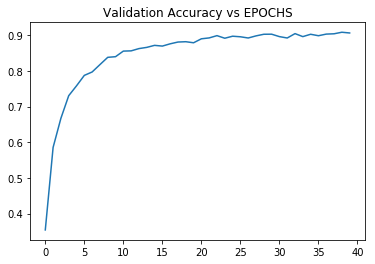

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
import random

# Load pickled data
# Pickle is used to serialize the data so that it can be saved to a disk

training_file = './data/train.p'
validation_file = './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

#Each pickled dataset is a dictionary of 4 keys
#dict_keys(['sizes', 'labels', 'features', 'coords'])
#print(train.keys())

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


####################################################################################################################
LEARN_RATE = 0.001
BATCH_SIZE = 128
EPOCHS = 40
KEEP_PROB = 0.5

#Number of labels should be same as number of input images
assert(len(X_train) == len(y_train))
n_train = len(X_train)

assert(len(X_valid) == len(y_valid))
n_valid = len(X_valid)

assert(len(X_test) == len(y_test))
n_test = len(X_test)

# Image Shape
image_shape = X_train[0].shape

# Number of classes / labels
n_classes = len(np.unique(y_train))

# print("Number of training examples =", n_train)
# print("Number of validation examples =", n_valid)
# print("Number of testing examples =", n_test)
# print("Image data shape =", image_shape)
# print("Number of classes =", n_classes)

####################################################################################################################

def readcsv(file):
    with open(file) as csvfile:
        reader = csv.DictReader(csvfile)
        label_dict = {row['ClassId']:row['SignName'] for row in reader}
        return label_dict

# Visualizations will be shown in the notebook using this command
%matplotlib inline
# plt.imshow(X_train[random.randint(0, n_train)])
# plt.show()

#Number of occurances of types of images in training set
count, label = np.unique(y_train, return_counts=True)
label_dict = readcsv('signnames.csv')
# for i, j in zip(count, label):
#     print('{} :: {}'.format(label_dict[repr(i)], j))

def get_label_name(label_no):
    return label_dict[label_no]


####################################################################################################################

#Images are in order, so shuffle them
#print('Labels before Shuffling', y_train[:25])

X_train_shuffle, y_train_shuffle = shuffle(X_train, y_train)
#print('Laels after Shuffling', y_train_shuffle[:25])

#To check if the count has changed after shuffling, which ideally shouldn't
label, count = np.unique(y_train_shuffle, return_counts=True)
#print('count',count)
label_dict_shuffle = readcsv('signnames.csv')
#print('\nLabels vs Count to ensure this pair doesn\'t change post shuffling\n')
count_var = []
for i, j in zip(count, label):
    #print('{} :: {}'.format(label_dict_shuffle[repr(j)], i))
    count_var.append(i)

# plt.plot(count_var)
# plt.title('Distribution of Labels vs number of images')


####################################################################################################################
# PRE PROCESSING DATA - GRAY SCALE, SHUFFLE, NORMALIZATION
X_train_gry = np.sum(X_train_shuffle/3, axis=3, keepdims=True)

X_train_shuffle_normalized = (X_train_gry - 127.5) / 255

#No change in shape due to normalization
#print('Orignal Shape of the Image {} \nShape after normalization {}'.format(X_train[0].shape, \
#                                                                            X_train_shuffle_normalized[0].shape))

#Mean value after normalization
#X_train_shuffle_mean = np.mean(X_train_shuffle_normalized)

#print('Original Mean {} \nNormalized Mean {}'.format(np.mean(X_train_shuffle), X_train_shuffle_mean))

#TODO - Loop through and display 10 images


# for i in range(10):
#     plt.figure(3)
#     plt.subplot(5,2,i+1)
#     img_name = get_label_name(repr(y_train_shuffle[i]))
#     plt.title(img_name)
#     plt.imshow(X_train_shuffle_normalized[i])



#Assigning back to original input variables after pre-processing
X_train, y_train = X_train_shuffle_normalized, y_train_shuffle

#This is to ensure the data is correct after shuffling
# plt.figure(4)
# plt.subplot(221)
# print(y_train[0])
# name = get_label_name(repr(y_train[0]))
# plt.title(name)
# plt.imshow(X_train[0], cmap='gray')
# plt.subplot(222)
# plt.title(name)
# plt.imshow(X_train_shuffle[0], cmap='gray')
# print('printing done!!!')

#Shuffle, Normalize Validation Set
X_valid_shuffle, y_valid_shuffle = shuffle(X_valid, y_valid)
X_valid_gry = np.sum(X_valid_shuffle/3, axis=3, keepdims=True)
X_valid_shuffle_normalized = (X_valid_gry - 127.5) / 255
X_valid, y_valid = X_valid_shuffle_normalized, y_valid_shuffle
#print('Image shape for Validation :: Train {} valid {}'.format(X_train[0].shape, X_valid[0].shape))

#Shuffle, Normalize Test Set
X_test_shuffle, y_test_shuffle = shuffle(X_test, y_test)
X_test_gry = np.sum(X_test_shuffle/3, axis=3, keepdims=True)
X_test_shuffle_normalized = (X_test_gry - 127.5) / 255
X_test, y_test = X_test_shuffle_normalized, y_test_shuffle
#print('Image shape for Test :: Train {} Test {}'.format(X_train[0].shape, X_test[0].shape))

####################################################################################################################
# Conv --> MaxPool --> Conv --> MaxPool --> FC1 --> FC2 --> o/p
def NN_LeNet(inputs):
    """
    LeNet Architecture
    CN1 --> P1 --> CN2 --> P2 --> Flatten --> FC1 --> FC2 --> O/P
    Each step after CN & FC follows by an activation layer
    Here are the dimensions of LeNet

    Input : 32, 32, 3 #3 channels for RGB. If you are using Gray scale, then have this as 1
    Layer1 : CN1 Output : 28, 28, 6
    Layer2 : P1 Output  : 14, 14, 6
    Layer3 : CN2 Output : 10, 10, 16
    Layer4 : P2 Output  : 5, 5, 16
    Layer5 : FC1 Output : 120
    Layer6 : FC2 Output : 84
    Layer7 : Logits     : 43 #43 different classes in German Traffic Sign dataset
    """

    #Defining weights, bias and outputs for each Layer
    mu = 0 #Mean of the variables in the random distribution
    sigma = 0.1 #Variance is 0.1
    
    #Layer1 - Convolution - Output Size : 28, 28, 6
    #After conversion to Gray scale, the dimension size is 1 instead of 3 (RGB)
    w_layer1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    b_layer1 = tf.Variable(tf.zeros(6))
    conv_layer1 = tf.nn.conv2d(inputs, w_layer1, strides=[1,1,1,1], padding='VALID') + b_layer1
    act_layer1 = tf.nn.relu(conv_layer1)
    #drop_layer1 = tf.nn.dropout(act_layer1, KEEP_PROB)

    #Layer2 - Max Pooling - Output Size : 14, 14, 6
    pool_layer2 = tf.nn.max_pool(act_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer3 - Convolution - Output Size : 10, 10, 16 ==> 16 filters, size is (W + 2P - F)/S + 1
    w_layer3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    b_layer3 = tf.Variable(tf.zeros(16))
    conv_layer3 = tf.nn.conv2d(pool_layer2, w_layer3, strides=[1, 1, 1, 1], padding='VALID') + b_layer3
    act_layer3 = tf.nn.relu(conv_layer3)
    #drop_layer3 = tf.nn.dropout(act_layer3, KEEP_PROB)

    #Layer4 - Max Pooling - Output Size : 5, 5, 16
    pool_layer4 = tf.nn.max_pool(act_layer3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatenning as next layers are fully connected
    flatten_vect = tf.contrib.layers.flatten(pool_layer4)

    #Layer5 - Fully Connected - Output = 120. Input dimension would be 5*5*16 = 400
    w_layer5 = tf.Variable(tf.random_normal(shape=(400, 120), mean=mu, stddev=sigma))
    b_layer5 = tf.Variable(tf.zeros(120))
    fc_layer5 = tf.matmul(flatten_vect, w_layer5) + b_layer5
    act_layer5 = tf.nn.relu(fc_layer5)
    drop_layer5 = tf.nn.dropout(act_layer5, KEEP_PROB)

    #Layer6 - Fully Connected - Output = 84. Input dimension is 120
    w_layer6 = tf.Variable(tf.random_normal(shape=(120, 84), mean=mu, stddev=sigma))
    b_layer6 = tf.Variable(tf.zeros(84))
    fc_layer6 = tf.matmul(drop_layer5, w_layer6) + b_layer6
    act_layer6 = tf.nn.relu(fc_layer6)
    drop_layer6 = tf.nn.dropout(act_layer6, KEEP_PROB)

    #Layer7 - Logits - Output Size : 43 types of image classes in the input dataset
    w_layer7 = tf.Variable(tf.random_normal(shape=(84, 43), mean=mu, stddev=sigma))
    b_layer7 = tf.Variable(tf.zeros(43))
    logits = tf.matmul(drop_layer6, w_layer7) + b_layer7
    
    return logits

####################################################################################################################
#None is a placeholder which depends on the number of input images in the batch (k)
#Observe that input data will be float, but labels will always be integers. Otherwise one hot doesn't work
input_data = tf.placeholder(tf.float32, (None, 32, 32, 1))
input_labels = tf.placeholder(tf.int32, (None))
one_hot_labels = tf.one_hot(input_labels, 43)

####################################################################################################################

logits = NN_LeNet(input_data)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_labels)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARN_RATE)
training_operation = optimizer.minimize(loss)

####################################################################################################################

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(x_data, y_data):
    total_accuracy = 0
    length_inputs = len(x_data)
    sess = tf.get_default_session()
    for offset in range(0, length_inputs, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_accuracy = sess.run(accuracy, feed_dict={input_data:batch_x, input_labels:batch_y})
        total_accuracy += (batch_accuracy * len(batch_x))
    return total_accuracy / length_inputs

####################################################################################################################

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_total = len(X_train)
    validation_accuracy_plot = []
    print('Training...')
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_total, BATCH_SIZE):
            batch_x, batch_y = X_train[offset:offset+BATCH_SIZE], y_train[offset:offset+BATCH_SIZE]
            sess.run(training_operation, feed_dict={input_data:batch_x, input_labels:batch_y})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print('EPOCH {} --- '.format(i+1)),
        print('Validation Accuracy = {:.3f}'.format(validation_accuracy),'\n')
        validation_accuracy_plot.append(validation_accuracy)
        
        try:
            saver
        except NameError:
            saver = tf.train.Saver()
        saver.save(sess, 'lenet')
        #print('Model Saved')
        
    plt.figure(3)
    plt.plot(validation_accuracy_plot)
    plt.title('Validation Accuracy vs EPOCHS')